### Load libraries and dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# file path
path = r'/Users/elliothaigh/Desktop/Data Analytics Course/Airlines Project'

In [3]:
# Load dataset
df = pd.read_pickle(os.path.join(path, '01 Data', 'flights_merged_categories.pkl'))

In [13]:
pd.set_option('display.max_columns', None)

## Data Cleaning

In [29]:
# Split dataframe into df_cancelled for all flights that were cancelled and df_delay for all flights that were delayed
df_cancelled = df[df['CANCELLED'] != 0]

In [30]:
df_cancelled.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,ORIGIN_AIRPORT_CODE,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_AIRPORT_CODE,DESTINATION_AIRPORT,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_COUNTRY,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DEPARTURE_DELAY_CATEGORY
2,2015,1,1,4,135,NaN,NaN,NaN,NaN,205.0,NaN,NaN,1448,NaN,NaN,600,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,NaN
322,2015,1,25,7,2140,NaN,NaN,NaN,NaN,210.0,NaN,NaN,1448,NaN,NaN,210,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,NaN
331,2015,1,26,1,1750,NaN,NaN,NaN,NaN,200.0,NaN,NaN,1448,NaN,NaN,2210,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,NaN
345,2015,1,27,2,1910,NaN,NaN,NaN,NaN,203.0,NaN,NaN,1448,NaN,NaN,2333,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,NaN
382,2015,1,30,5,1910,NaN,NaN,NaN,NaN,203.0,NaN,NaN,1448,NaN,NaN,2333,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,NaN


In [34]:
# Split dataframe into df_cancelled for all flights that were cancelled and df_delay for all flights that were delayed
df_delay = df.dropna(subset=['DEPARTURE_DELAY'])

In [37]:
#drop columns
columns_to_drop = ['CANCELLED', 'CANCELLATION_REASON']
df_delay = df_delay.drop(columns=columns_to_drop)

In [38]:
df_delay.head(50)

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,ORIGIN_AIRPORT_CODE,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_AIRPORT_CODE,DESTINATION_AIRPORT,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_COUNTRY,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DEPARTURE_DELAY_CATEGORY
0,2015,1,1,4,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
1,2015,1,1,4,45,41.0,-4.0,17.0,58.0,204.0,194.0,173.0,1448,451.0,4.0,509,455.0,-14.0,0,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
3,2015,1,1,4,155,140.0,-15.0,17.0,157.0,218.0,198.0,170.0,1448,547.0,11.0,633,558.0,-35.0,0,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
4,2015,1,1,4,220,209.0,-11.0,15.0,224.0,200.0,199.0,176.0,1448,620.0,8.0,640,628.0,-12.0,0,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
5,2015,1,1,4,505,457.0,-8.0,16.0,513.0,205.0,199.0,179.0,1448,912.0,4.0,930,916.0,-14.0,0,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
6,2015,1,1,4,700,653.0,-7.0,16.0,709.0,210.0,202.0,179.0,1448,1108.0,7.0,1130,1115.0,-15.0,0,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
7,2015,1,1,4,1035,1027.0,-8.0,21.0,1048.0,207.0,206.0,180.0,1448,1448.0,5.0,1502,1453.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
8,2015,1,1,4,1340,1330.0,-10.0,18.0,1348.0,195.0,195.0,171.0,1448,1739.0,6.0,1755,1745.0,-10.0,0,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
9,2015,1,1,4,1430,1424.0,-6.0,7.0,1431.0,200.0,189.0,175.0,1448,1826.0,7.0,1850,1833.0,-17.0,0,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure
10,2015,1,1,4,1615,1604.0,-11.0,10.0,1614.0,200.0,187.0,173.0,1448,2007.0,4.0,2035,2011.0,-24.0,0,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,Early departure


In [39]:
# Check for missing values

df_delay.isnull().sum()

YEAR                              0
MONTH                             0
DAY                               0
DAY_OF_WEEK                       0
SCHEDULED_DEPARTURE               0
DEPARTURE_TIME                    0
DEPARTURE_DELAY                   0
TAXI_OUT                       2798
WHEELS_OFF                     2798
SCHEDULED_TIME                    6
ELAPSED_TIME                  17970
AIR_TIME                      17970
DISTANCE                          0
WHEELS_ON                      6128
TAXI_IN                        6128
SCHEDULED_ARRIVAL                 0
ARRIVAL_TIME                   6128
ARRIVAL_DELAY                 17970
DIVERTED                          0
AIR_SYSTEM_DELAY            4245740
SECURITY_DELAY              4245740
AIRLINE_DELAY               4245740
LATE_AIRCRAFT_DELAY         4245740
WEATHER_DELAY               4245740
AIRLINE                           0
ORIGIN_AIRPORT_CODE               0
ORIGIN_AIRPORT                    0
ORIGIN_CITY                 

In [40]:
#Replace NaN in delay collumns with 0 to represent no delay.
columns_to_replace = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df_delay[columns_to_replace] = df_delay[columns_to_replace].fillna(0)

In [41]:
# Check for missing values

df_delay.isnull().sum()

YEAR                            0
MONTH                           0
DAY                             0
DAY_OF_WEEK                     0
SCHEDULED_DEPARTURE             0
DEPARTURE_TIME                  0
DEPARTURE_DELAY                 0
TAXI_OUT                     2798
WHEELS_OFF                   2798
SCHEDULED_TIME                  6
ELAPSED_TIME                17970
AIR_TIME                    17970
DISTANCE                        0
WHEELS_ON                    6128
TAXI_IN                      6128
SCHEDULED_ARRIVAL               0
ARRIVAL_TIME                 6128
ARRIVAL_DELAY               17970
DIVERTED                        0
AIR_SYSTEM_DELAY                0
SECURITY_DELAY                  0
AIRLINE_DELAY                   0
LATE_AIRCRAFT_DELAY             0
WEATHER_DELAY                   0
AIRLINE                         0
ORIGIN_AIRPORT_CODE             0
ORIGIN_AIRPORT                  0
ORIGIN_CITY                     0
ORIGIN_STATE                    0
ORIGIN_COUNTRY

## Departure Delay and Airline Delay Regression

Our first hypothesis to test is Airline delays are the two cause of delays among flights in the US. We will test this hypothesis with a regression analysis of the departure delay variable and the airline delay variable

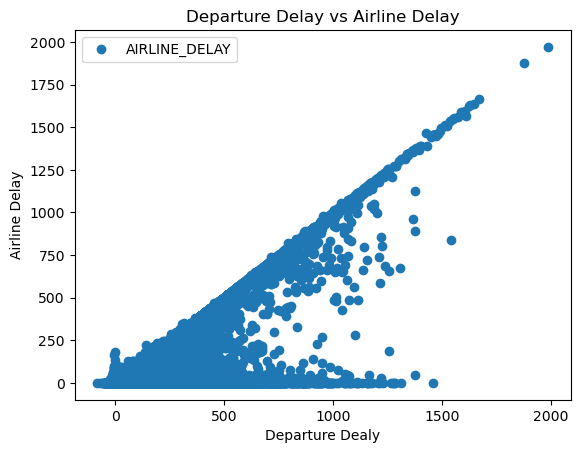

In [42]:
# Create a scatterplot using matplotlib to examine how the chosen variables plot against each other.

df_delay.plot(x = 'DEPARTURE_DELAY', y='AIRLINE_DELAY',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Departure Delay vs Airline Delay')  
plt.xlabel('Departure Dealy')  
plt.ylabel('Airline Delay')  
plt.show()

In [43]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_delay['DEPARTURE_DELAY'].values.reshape(-1,1)
y = df_delay['AIRLINE_DELAY'].values.reshape(-1,1)

In [44]:
X

array([[-11.],
       [ -4.],
       [-15.],
       ...,
       [ 10.],
       [-14.],
       [-26.]])

In [45]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
# Create a regression object.

regression = LinearRegression()

In [47]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [48]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

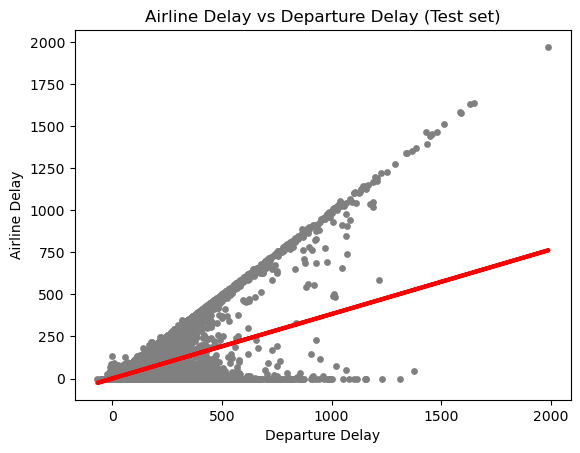

In [51]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Airline Delay vs Departure Delay (Test set)')
plot_test.xlabel('Departure Delay')
plot_test.ylabel('Airline Delay')
plot_test.show()

In the graph above we can see the regression line (red) alongside the plots for our two variables. While the trend is clear that there is a positive corelation between the two, the fit is not very good and we can see many points that are far from the regression line. This is particularly true for the more extreme delay cases where the distance from the regression line is greatest. 

In [52]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [53]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.38338632]]
Mean squared error:  284.4377914284392
R2 score:  0.42440123150914444


In [54]:
# Compare predicted values and actual values
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.0,2.544751
1,0.0,0.627820
2,0.0,-2.822657
3,0.0,-0.138953
4,0.0,-3.972816
5,73.0,27.848248
6,12.0,10.979250
7,0.0,-3.972816
8,64.0,24.397771
9,0.0,-1.672498


Our model has not performed particualarly well. The R2 score of 4.2 and the mean squared of 284 both indicate that our model has not been successful. This is not overly surprising. While it tells us there is a positive relationship between airline delay and departure delay, as expected there are a number of other factors that influence the overall delay and while airline delay may be a cause in some flights, in others it may be a complete non factor.

If we examine the comparison of the predicted values against the actual values above we can see that there are some significant disparities. This is particularly evident in the numerous entries where the actual airline delay was 0 but the predication was far off 0. 

It is also worth noting that the dataset we are working with is all flights that have any sort of delay or cancellation in 2015 in the United States. Therefore it does not include any data for flights that were completed on time.

### Export dataframes

In [70]:
df.to_pickle(os.path.join(path, '01 Data', 'flights_merged_categories.pkl'))
df_delay.to_pickle(os.path.join(path, '01 Data', 'delayed_flights.pkl'))
df_cancelled.to_pickle(os.path.join(path, '01 Data', 'cancelled_flights.pkl'))